># Ecommerce Customer Churn Analysis and Prediction


# Latar Belakang
Sebuah perusahaaan e-commerce berskala nasional menjual beberapa barang seperti keperluan sehari-hari, elektronik, fashion, aksesoris, dan lain-lain. Penjualan dilakukan berbasis online melalui aplikasi dan website. Perusahaan memiliki ribuan pelanggan dengan berbagai profil. Selama berjalannya operasional penjualan, terdapat beberapa kendala termasuk pelanggan yang berhenti belanja pada perusahaan tersebut (Churn). Melalui data analisis ini, perusahaan ingin mengetahui demografi pelanggan yang berhenti belanja dan pendekatan yang tepat untuk menangani permasalahan tersebut

**Rumusan Masalah**
1. Bagaimana demografi pelanggan yang berhenti belanja (churn)?
2. Pendekatan atau promosi yang dapat dilakukan agar pelanggan tidak melakukan churn?


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data 

In [119]:
df = pd.read_csv(r"C:\Users\ASUS\Documents\Materi Purwadhika Module 3\E Commerce Dataset.csv")
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


Terdapat 20 Kolom pada dataset Ecommerce Customer Churn Analysis and Prediction
- CustomerID = ID pelanggan unik
- Churn = Bendera Churn
- Tenure = Masa pelanggan bergabung
- PreferredLoginDevice = Perangkat login pilihan pelanggan
- CityTier = Tingkat kota
- WarehouseToHome = Jarak antara gudang ke rumah pelanggan
- PreferredPaymentMode = Metode pembayaran pilihan pelanggan
- Gender = Jenis Kelamin pelanggan
- HourSpendOnApp = Jumlah jam yang dihabiskan di aplikasi seluler atau situs web
- NumberOfDeviceRegistered = Jumlah total penipuan yang terdaftar pada pelanggan tertentu
- PreferedOrderCat = Kategori pesanan pilihan pelanggan bulan lalu
- SatisfactionScore = Skor kepuasan pelanggan terhadap layanan
- MarritalStatus = Status pernikahan pelanggan
- NumberOfAddress = Jumlah total yang ditambahkan pada pelanggan tertentu
- Complain = Setiap keluhan yang diajukan bulan lalu
- OrderAmountHikeFromlastYear = Persentase peningkatan pesanan dari tahun lalu
- CouponUsed = Jumlah total kupon yang telah digunakan bulan lalu
- OrderCount = Jumlah total pesanan yang telah dilakukan bulan lalu bulan
- DaySinceLastOrderr = Hari Sejak pesanan terakhir oleh pelanggan
- CashbackAmount = Rata-rata cashback bulan lalu

## DATA UNDERSTANDING

In [120]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (5630, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus        

In [121]:
display(df.describe(), df.describe(include='object'))

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [122]:
columns = df.columns
dtype = df.dtypes
total_missing_value = round(df.isnull().sum() / len(df) * 100, 3)
missing_value = df.isnull().sum() 
total_unique = [len(df[col].unique()) for col in columns]
unique = [df[col].unique().tolist() for col in columns]
desciption = pd.DataFrame({
    'type': dtype,
    'total_missing_value (%)': total_missing_value,
     'missing_value': missing_value,
    'total_unique_value': total_unique,
    'unique': unique
})
desciption

,type,total_missing_value (%),missing_value,total_unique_value,unique
CustomerID,int64,0.000,0,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
Churn,int64,0.000,0,2,"[1, 0]"
Tenure,float64,4.689,264,37,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
PreferredLoginDevice,object,0.000,0,3,"[Mobile Phone, Phone, Computer]"
CityTier,int64,0.000,0,3,"[3, 1, 2]"
WarehouseToHome,float64,4.458,251,35,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
PreferredPaymentMode,object,0.000,0,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
Gender,object,0.000,0,2,"[Female, Male]"
HourSpendOnApp,float64,4.529,255,7,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
NumberOfDeviceRegistered,int64,0.000,0,6,"[3, 4, 5, 2, 1, 6]"


<Axes: >

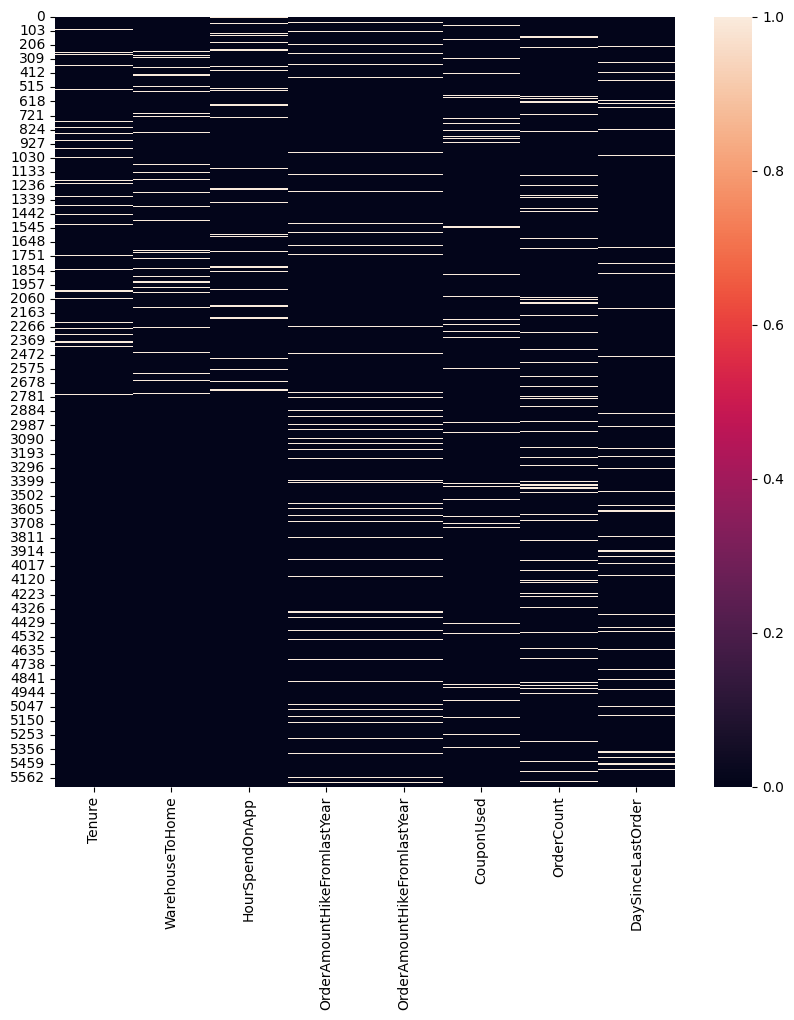

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']].isna())

Terdapat beberepa missing value pada kolom Tenure, WarehouseToHome ,HourSpendOnApp, OrderAmountHikeFromlastYear, OrderAmountHikeFromlastYear,  CouponUsed, OrderCount, DaySinceLastOrder dengan persentase 4-5%

# Data Cleaning

In [124]:
df["Tenure"] = df["Tenure"].fillna(0)
df["DaySinceLastOrder"] = df["DaySinceLastOrder"].fillna(0)
df['OrderAmountHikeFromlastYear'] = df["OrderAmountHikeFromlastYear"].fillna(0)
df['CouponUsed'] = df["CouponUsed"].fillna(0)
df['OrderCount'] = df["OrderCount"].fillna(0)
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())

Pengisian missing value

- Tenure diisi 0 dengan pertimbangan pelanggan baru 
- Hour Spend on App diisi dengan median dikarenakan tidak memungkinkan waktu pada aplikasi 0
- Warehouse To Home diisi dengan median
- Order Amount Hike From Last Year diisi 0 dengan pertimbangan pelanggan baru dan belum melakukan pembelian
- Coupon Used diisi 0 dengan pertimbangan belum menggunakan kupon
- Order Count diisi  0 dengan pertimbangan belum melakukan pembelian
- Day Since Last Order diisi 0 dikarenakan tidak ada data pembelian sebelumnya

In [125]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Mengganti beberapa variabel yang tidak konsisten dan memiliki value yang sama

In [126]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({
    'Phone': 'Mobile Phone',
})

In [127]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'COD': 'Cash on Delivery',
    'CC': 'Credit Card',
})

# Data Analysis

In [128]:
df_churn = df['Churn'].value_counts().reset_index()
df_churn

,Churn,count
0,0,4682
1,1,948


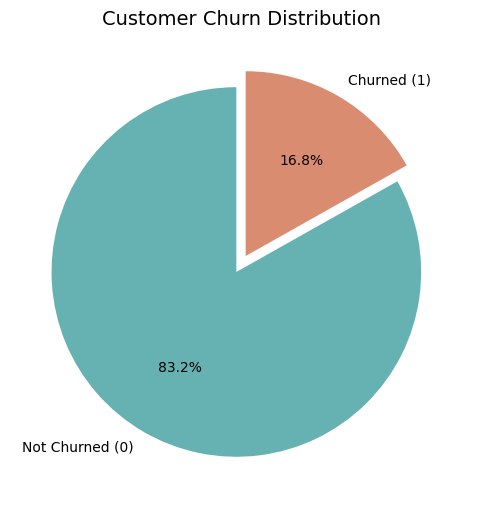

In [129]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts,
    labels=['Not Churned (0)', 'Churned (1)'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b2b2', '#d98c70'],
    explode=(0.05, 0.05)  
)

plt.title('Customer Churn Distribution', fontsize=14)
plt.show()

Pada pie chart di atas dapat dilihat pelanggan yang churn sebesar 16.8% atau sebesar 948 pelanggan

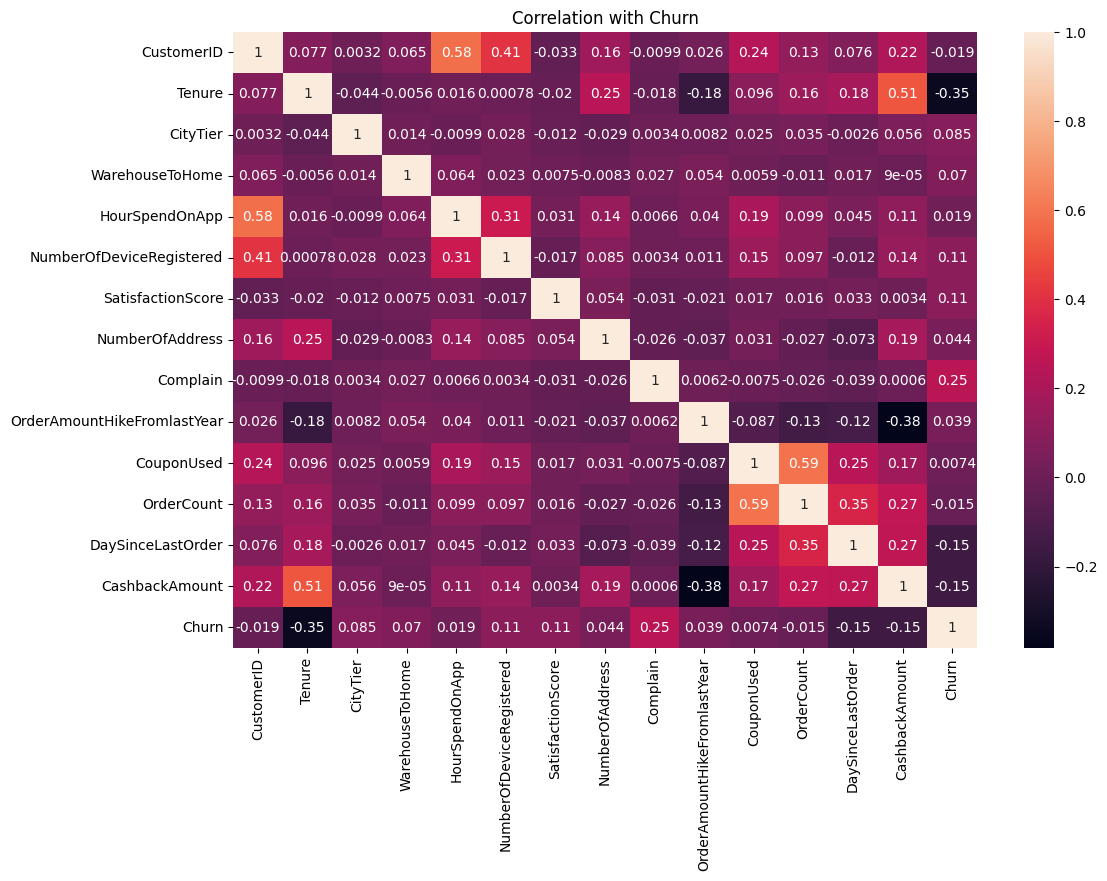

In [130]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()


if "Churn" in num_cols:
    num_cols.remove("Churn")

corr = df[num_cols + ["Churn"]].corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation with Churn")
plt.show()

Melalui heatmap diatas dapat disimpulkan faktor terbesar pelanggan churn terdapat pada tenure 

<Axes: xlabel='Churn', ylabel='Tenure'>

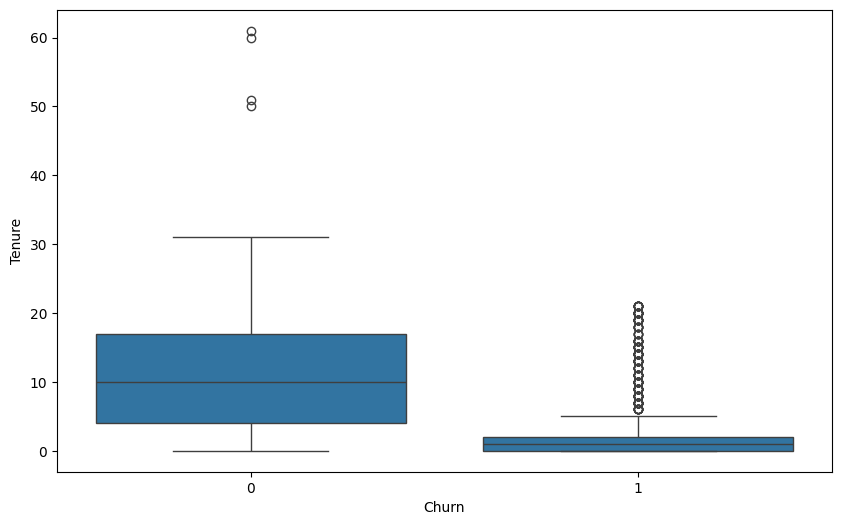

In [131]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Tenure')

Pelanggan yang churn cenderung memiliki tenure yang rendah dalam artian pelanggan baru, sedangkan pelanggan dengan tenure yang lebih lama cenderung lebih loyal

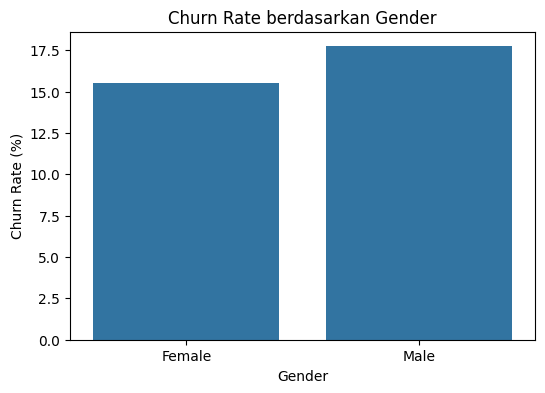

In [132]:
plt.figure(figsize=(6,4))
churn_rate = (df.groupby("Gender")["Churn"].mean()*100).reset_index()
sns.barplot(data=churn_rate, x="Gender", y="Churn")
plt.title("Churn Rate berdasarkan Gender")
plt.ylabel("Churn Rate (%)")
plt.show()

Pelanggan dengan jenis kelamin pria memiliki kecenderungan churn rate lebih besar dibandingkan wanita

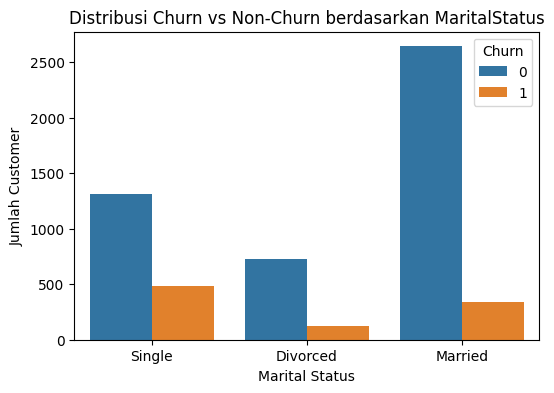

In [133]:

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="MaritalStatus", hue="Churn")

plt.title("Distribusi Churn vs Non-Churn berdasarkan MaritalStatus")
plt.ylabel("Jumlah Customer")
plt.xlabel("Marital Status")
plt.show()

Melalui plot di atas dapat dilihat bahwa pelanggan dengan churn rate tinggi yaitu pelanggan dengan status single dan diikuti dengan status married

<Axes: xlabel='CityTier', ylabel='count'>

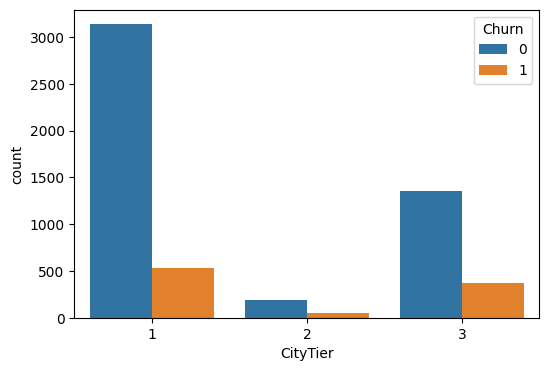

In [134]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='CityTier', hue='Churn')

Melalui plot di atas dapat dilihat bahwa pelanggan dengan churn rate tinggi yaitu pelanggan yang bertempat pada city tier 1 dan diikuti pelanggan pada city tier 3 

In [135]:
df[["Churn","PreferredPaymentMode"]].value_counts()

Churn  PreferredPaymentMode
0      Debit Card              1958
       Credit Card             1522
       E wallet                 474
       Cash on Delivery         386
1      Debit Card               356
0      UPI                      342
1      Credit Card              252
       E wallet                 140
       Cash on Delivery         128
       UPI                       72
Name: count, dtype: int64

<Axes: xlabel='PreferredPaymentMode', ylabel='count'>

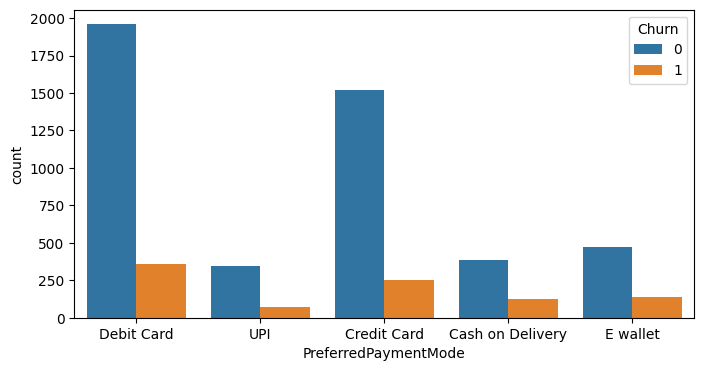

In [136]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='PreferredPaymentMode', hue='Churn')

Pelanggan dengan churn rate tinggi terdapat pada pelanggan dengan metode pembayaran Debit Card dan Credit Card

<Axes: xlabel='PreferedOrderCat', ylabel='count'>

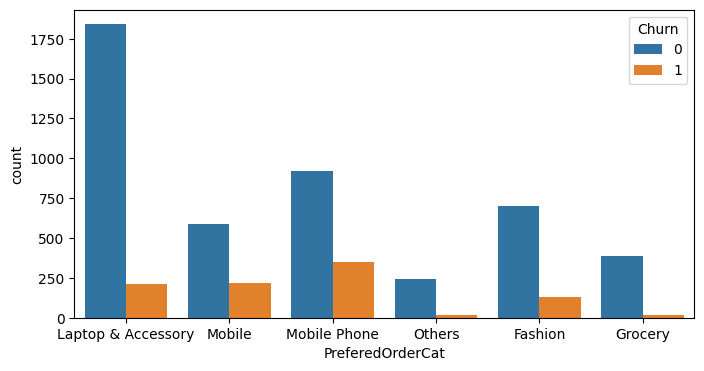

In [137]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='PreferedOrderCat', hue='Churn')

Pelanggan dengan churn rate tinggi terdapat pada pelanggan dengan kategori pembelian mobile phone, mobile, dan laptop & aksesoris. Dapat disimpulkan pelanggan yang churn terbanyak pada barang elektronik

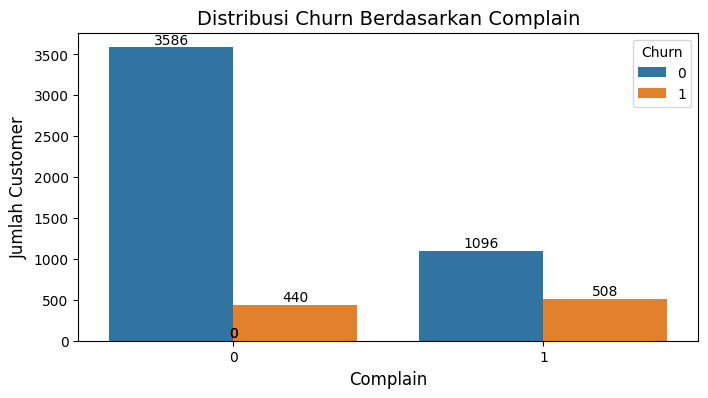

In [138]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='Complain', hue='Churn')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,  
        height + 5,                      
        int(height),                     
        ha='center', va='bottom', fontsize=10
    )

plt.title("Distribusi Churn Berdasarkan Complain", fontsize=14)
plt.xlabel("Complain", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.show()

Hampir 50% dari pelanggan yang melakukan complain merupakan pelanggan churn, dapat disimpulkan bahwa complain juga merupakan faktor besar yang mempengaruhi churn

<Axes: xlabel='Complain', ylabel='count'>

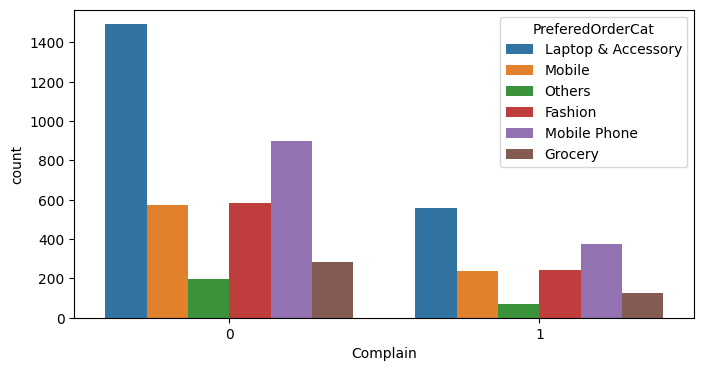

In [139]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Complain', hue='PreferedOrderCat')

Complain paling banyak terjadi pada kategori barang elektronik (Laptop & Accessory) dan mobile phone

<Axes: xlabel='Complain', ylabel='count'>

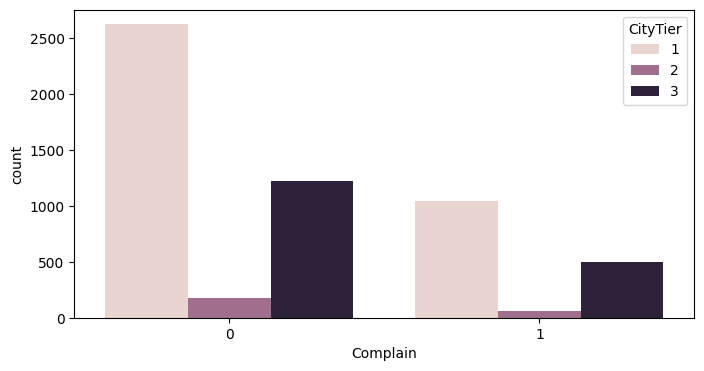

In [140]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Complain', hue='CityTier')

Berdasarkan City tier, complain paling banyak terdapat pada city tier 1 dan 3

<Axes: xlabel='Complain', ylabel='count'>

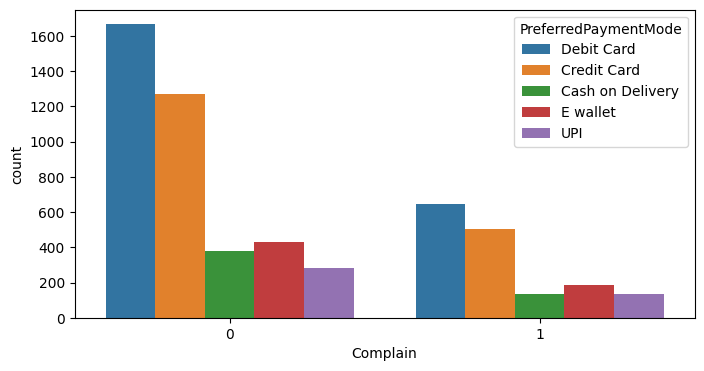

In [141]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Complain', hue='PreferredPaymentMode')

Dari plot di atas dapat dilihat bahwa pelanggan yang melakukan churn banyak terdapat pada pelanggan dengan metode pembayaran debit card dan credit card

# Kesimpulan

1. Faktor Utama churn adalah tenure yang berarti pelanggan baru 
2. Complain menjadi salah satu factor besar terjadinya churn 
3. Complain banyak terjadi pada kategori barang elektroni dan metode pembayaran debit card dan credit card sehingga memiliki churn rate yang tinggi
4. City tier 3 memiliki potensi churn yang tinggi

# Rekomendasi

1. Program bagi pelanggan baru
   - Voucher atau diskon bagi pelanggan baru
   - Revitalisasi UI dan UX sehingga aplikasi lebih ramah bagi pelanggan baru
   - Tutorial aplikasi bagi pengguna baru
2. Menangani Complain
   - Memperbaiki kualitas barang elektronik sehingga complain menurun
   - Memperbaiki system pembayaran debit card dan credit card
   - Memberikan manfaat lebih seperti diskon dan vouche bagi pelanggan dengan pembayaran debit card dan credit card
3. Meningkatkan fasilitas distribusi
   - Untuk menangani permasalahan pada city tier 3 diperlukan perbaikan jalur logistik dan distribusi dalam hal kecepatan dan keamanan pengiriman